In [1]:
#Importing the initial libraries required for our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
#Upload Data input for training
data = pd.read_csv("data_input.csv",sep=",")

In [4]:
data.index=data['day']

In [5]:
data.sort_index(inplace=True)

In [6]:
data.index = pd.to_datetime(data.index)
data.index=data.index.strftime("%Y-%m-%d")

In [7]:
data.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,profit_margin,rest_quantity
day,,,,,,,,,,
2021-04-03,2021-04-03,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77,0.380386,-23.0
2021-04-03,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98,1.225094,-2.0
2021-04-03,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33,0.567887,23.0
2021-04-04,2021-04-04,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0,0.00,0.567887,0.0
2021-04-04,2021-04-04,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0,0.00,0.380386,0.0


In [8]:
data.columns

Index(['day', 'item_number', 'item_name', 'purchase_price',
       'suggested_retail_price', 'orders_quantity', 'sales_quantity',
       'revenue', 'profit_margin', 'rest_quantity'],
      dtype='object')

In [9]:
# Select the features and target variable
X = data[['purchase_price', 'suggested_retail_price', 'orders_quantity','revenue', 'profit_margin']] 
y = data['sales_quantity']


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 1- Linear Regression model 

In [11]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using the R-squared metric
r_squared = model.score(X_test, y_test)
print('R-squared:', r_squared)

R-squared: 0.8860543913546675


In [12]:
mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 3.737823288783648


we obtain a good metrics 0.88 wich is near to 1. 

## 2- Time Series Approch

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='day'>

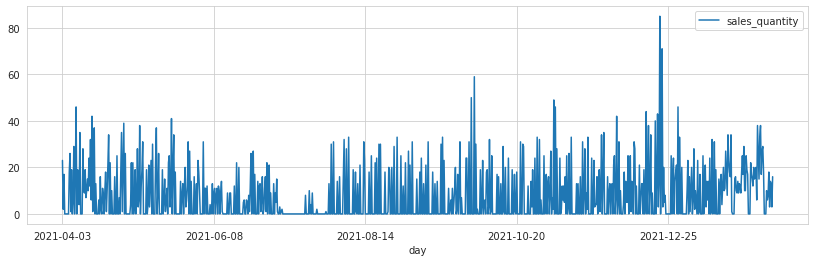

In [14]:
data.plot(y="sales_quantity", figsize=(14,4))

we may try to work with tho log of sales_quantity

In [15]:
data.index = pd.to_datetime(data.index)
data.index=data.index.strftime("%Y-%m-%d")

In [16]:
data.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,profit_margin,rest_quantity
day,,,,,,,,,,
2021-04-03,2021-04-03,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77,0.380386,-23.0
2021-04-03,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98,1.225094,-2.0
2021-04-03,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33,0.567887,23.0
2021-04-04,2021-04-04,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,0.0,0.0,0.00,0.567887,0.0
2021-04-04,2021-04-04,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0,0.00,0.380386,0.0


In [29]:
 seasonal_decompose(data["sales_quantity"])

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [28]:
x = data["sales_quantity"]
x= x.astype(int)
y = np.log(x)
decomp_y = seasonal_decompose(y,  model='additive')
decomp_y.plot()
plt.show()

ValueError: This function does not handle missing values

## MLP for Time Series Forecasting

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [48]:
#Upload Data input for training
data = pd.read_csv("data_input.csv",sep=",")

In [49]:
data.columns

Index(['day', 'item_number', 'item_name', 'purchase_price',
       'suggested_retail_price', 'orders_quantity', 'sales_quantity',
       'revenue', 'profit_margin', 'rest_quantity'],
      dtype='object')

In [36]:
features=['item_number',  'orders_quantity', 'revenue', 'profit_margin', ]

In [37]:
X = data[features] 
y = data['sales_quantity']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
model = keras.Sequential()
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='mse', optimizer='sgd')

#model.fit(Xtrain, ytrain, epochs=100, verbose=0)
history = model.fit(X_train, y_train, epochs=e, validation_data=(X_test, y_test), verbose=0, shuffle=False)
predi_train = model.predict(X_train)
predi_test = model.predict(X_test)
Y_train[PREDICTION] = predi_train
Y_test[PREDICTION] = predi_test

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

NameError: name 'Ytrain' is not defined